In [63]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('TrainingWiDS2021.csv',index_col=0)
data.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,...,NaN,NaN,0,0,0,0,0,0,0,1
2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,...,51.0,51.0,0,0,0,0,0,0,0,1
3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0
4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,...,337.0,337.0,0,0,0,0,0,0,0,0
5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,...,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:
cat = {'ethnicity':'category',
       'gender':'category', 
       'hospital_admit_source':'category',
       'icu_admit_source':'category',
       'icu_stay_type':'category', 
       'icu_type':'category',
      }

#data = data.astype(cat)
data[cat]

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type
1,Caucasian,M,Floor,Floor,admit,CTICU
2,Caucasian,F,Floor,Floor,admit,Med-Surg ICU
3,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU
4,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU
5,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU
...,...,...,...,...,...,...
130153,Caucasian,M,Emergency Department,Accident & Emergency,admit,Cardiac ICU
130154,Caucasian,F,Direct Admit,Accident & Emergency,admit,MICU
130155,African American,M,Emergency Department,Accident & Emergency,admit,Cardiac ICU
130156,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU


In [4]:
t_data = pd.read_csv('UnlabeledWiDS2021.csv',index_col=0)
t_data[cat]

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type
1,Caucasian,F,Floor,Accident & Emergency,admit,Med-Surg ICU
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU
3,Caucasian,F,Floor,Floor,admit,Med-Surg ICU
4,Caucasian,M,Floor,Floor,admit,Med-Surg ICU
5,Caucasian,M,Direct Admit,Accident & Emergency,admit,Med-Surg ICU
...,...,...,...,...,...,...
10230,Caucasian,F,Floor,Floor,admit,Med-Surg ICU
10231,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU
10232,Caucasian,F,Step-Down Unit (SDU),Floor,admit,Med-Surg ICU
10233,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU


In [5]:
cat

{'ethnicity': 'category',
 'gender': 'category',
 'hospital_admit_source': 'category',
 'icu_admit_source': 'category',
 'icu_stay_type': 'category',
 'icu_type': 'category'}

In [17]:
pd.DataFrame([data.icu_type.value_counts(normalize=True), t_data.icu_type.value_counts(normalize=True)]).T

,icu_type,icu_type
Med-Surg ICU,0.549091,0.544264
CCU-CTICU,0.086204,0.087551
MICU,0.084083,0.085792
Neuro ICU,0.080925,0.076021
Cardiac ICU,0.063585,0.067520
SICU,0.063446,0.067618
CSICU,0.038269,0.037522
CTICU,0.034397,0.033711


In [18]:
pd.DataFrame([data.icu_stay_type.value_counts(normalize=True), t_data.icu_stay_type.value_counts(normalize=True)]).T

,icu_stay_type,icu_stay_type
admit,0.958389,0.985734
transfer,0.036886,0.011823
readmit,0.004725,0.002443


In [19]:
pd.DataFrame([data.icu_admit_source.value_counts(normalize=True), t_data.icu_admit_source.value_counts(normalize=True)]).T

,icu_admit_source,icu_admit_source
Accident & Emergency,0.591501,0.585170
Operating Room / Recovery,0.211181,0.221177
Floor,0.165175,0.162210
Other Hospital,0.026663,0.024782
Other ICU,0.005480,0.006661


In [20]:
pd.DataFrame([data.hospital_admit_source.value_counts(normalize=True), t_data.hospital_admit_source.value_counts(normalize=True)]).T

,hospital_admit_source,hospital_admit_source
Emergency Department,0.528656,0.512598
Operating Room,0.141885,0.147980
Floor,0.116792,0.149447
Direct Admit,0.085118,0.092788
Recovery Room,0.047061,0.053993
Other Hospital,0.024928,0.023064
Acute Care/Floor,0.021628,NaN
Step-Down Unit (SDU),0.016574,0.013198
PACU,0.010633,NaN
Other ICU,0.002919,0.003066


In [32]:
data.diabetes_mellitus.value_counts(normalize=True)

0    0.783715
1    0.216285
Name: diabetes_mellitus, dtype: float64

In [38]:
solution_temp = pd.read_csv('SolutionTemplateWiDS2021.csv',index_col=0)
solution_temp['diabetes_mellitus'] = 0.216285

In [39]:
solution_temp.to_csv('baseline_submission.csv')

In [44]:
solution_temp.diabetes_mellitus.value_counts(dropna=False)

0.216285    10234
Name: diabetes_mellitus, dtype: int64

In [48]:
corr_matrix = data.corr().diabetes_mellitus

In [139]:
data[corr_matrix.sort_values(ascending = False)[:25].index].dtypes[:25]

diabetes_mellitus             int64
d1_glucose_max              float64
glucose_apache              float64
h1_glucose_max              float64
h1_glucose_min              float64
bmi                         float64
weight                      float64
d1_bun_max                  float64
bun_apache                  float64
d1_bun_min                  float64
d1_glucose_min              float64
h1_bun_min                  float64
h1_bun_max                  float64
d1_creatinine_max           float64
d1_creatinine_min           float64
creatinine_apache           float64
h1_creatinine_min           float64
h1_creatinine_max           float64
arf_apache                    int64
d1_potassium_max            float64
h1_potassium_max            float64
h1_potassium_min            float64
age                         float64
d1_sysbp_noninvasive_max    float64
d1_sysbp_max                float64
dtype: object

In [137]:
corr_matrix.sort_values(ascending = False)[:25].index

Index(['diabetes_mellitus', 'd1_glucose_max', 'glucose_apache',
       'h1_glucose_max', 'h1_glucose_min', 'bmi', 'weight', 'd1_bun_max',
       'bun_apache', 'd1_bun_min', 'd1_glucose_min', 'h1_bun_min',
       'h1_bun_max', 'd1_creatinine_max', 'd1_creatinine_min',
       'creatinine_apache', 'h1_creatinine_min', 'h1_creatinine_max',
       'arf_apache', 'd1_potassium_max', 'h1_potassium_max',
       'h1_potassium_min', 'age', 'd1_sysbp_noninvasive_max', 'd1_sysbp_max'],
      dtype='object')

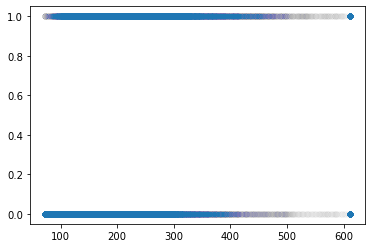

In [127]:
plt.scatter(data.d1_glucose_max,data.diabetes_mellitus,alpha=.002)
plt.show()

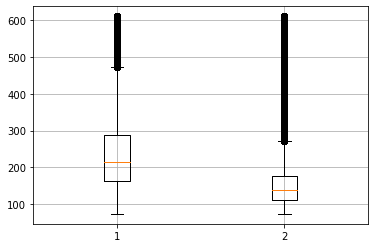

In [129]:
diabetes = data.loc[data.diabetes_mellitus==1,'d1_glucose_max'].dropna()
no_diabetes = data.loc[data.diabetes_mellitus==0,'d1_glucose_max'].dropna()

plt.boxplot([diabetes.values,no_diabetes.values])
plt.grid(True)
#plt.ylim(-1,101)
plt.show()

63